Saheedah Yusuf
 - Jalen 
 - Owen 
 - Tiana

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [3]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [4]:
# Your code here. Add cells as needed.

#splitting the date into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

#Create and fit the model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

R2_train = model_1.score(X_train, y_train)
R2_test = model_1.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

model_1.__dict__

print_model(model_1.intercept_, model_1.coef_, column_names, 'Model 1')
print_model(bias, coef, column_names, 'True Model')
print(f'R2 test: {R2_test: 0.3f}')
print(f'MSE test: {MSE_test: 0.3f}')

Model 1:
 y = -6.88 + 21.52*x1 + 21.04*x2 + 95.90*x3 + 6.66*x4 + 49.21*x5
True Model:
 y = -6.25 + 21.88*x1 + 21.21*x2 + 96.62*x3 + 6.93*x4 + 48.32*x5
R2 test:  0.993
MSE test:  85.502


#### Your written answers here

What are your model parameters?
 -  y = -6.88 + 21.52*x1 + 21.04*x2 + 95.90*x3 + 6.66*x4 + 49.21*x5

What were your MSE and R^2?
 - R2 test:  0.993
 - MSE test:  85.502



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [5]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


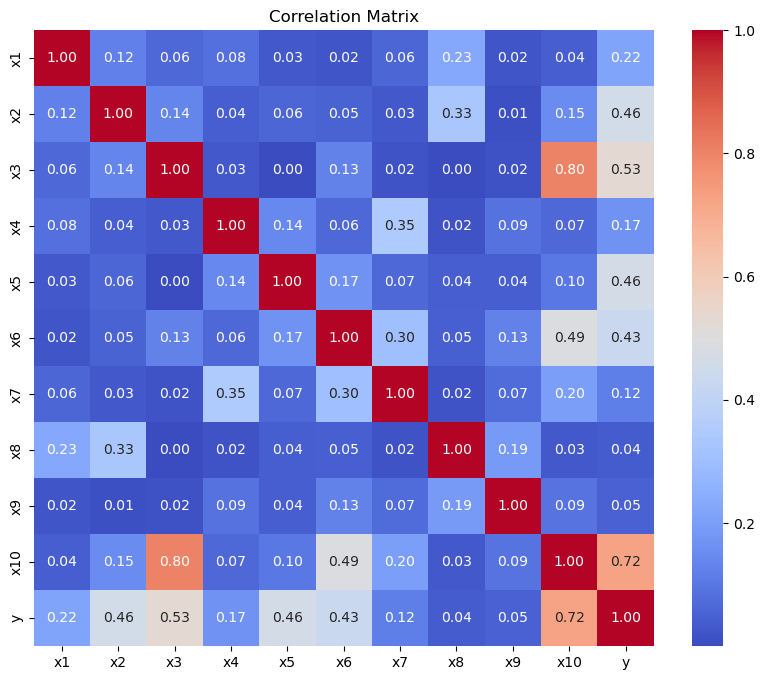

In [6]:
# Show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(np.abs(reg2_df.corr()), annot=True, cmap = 'coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [7]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate model performance
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

# Display results
print("R-squared (R²):", r2)
print("Mean Squared Error (MSE):", mse)
print_model(model.intercept_, model.coef_, column_names, model_name = 'Model 2')
print_model(bias, coef, column_names, model_name = 'True Model')
print(f'R2 test: {r2: 0.3f}')
print(f'MSE test: {mse: 0.3f}')

R-squared (R²): 0.8950820070826185
Mean Squared Error (MSE): 8.829113777332287
Model 2:
 y = -15.08 + 62.56*x1 + 71.19*x2 + 68.89*x3 + 14.99*x4 + 54.98*x5 + 46.49*x6 + -5.68*x7 + -5.35*x8 + 1.80*x9 + 59.93*x10
True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
R2 test:  0.895
MSE test:  8.829


candidate_idx = np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])-1
Z = X[:, candidate_idx]
Z_names = [column_names(idx) for idx in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

print(f'R2_train: {R2_train:.2f}\nR2_test: {R2_test:.2f}')

#### Your written answers here

What are your model parameters?
 - y = -15.08 + 62.56*x1 + 71.19*x2 + 68.89*x3 + 14.99*x4 + 54.98*x5 + 46.49*x6 + -5.68*x7 + -5.35*x8 + 1.80*x9 + 59.93*x10

Which features (x1, x2...) were significant? Which were co-linear?
 - x3 and x6 are significant. x3 and x6 are co-linear to x10
 
What were your MSE and R^2?
 - R2 test:  0.895
 - MSE test:  8.829



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [8]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(columns=['id', 'date', 'zipcode'], inplace=True)
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


numeric_housing_df = housing_df.select_dtypes(include=[np.number])

corr_matrix = numeric_housing_df.corr()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


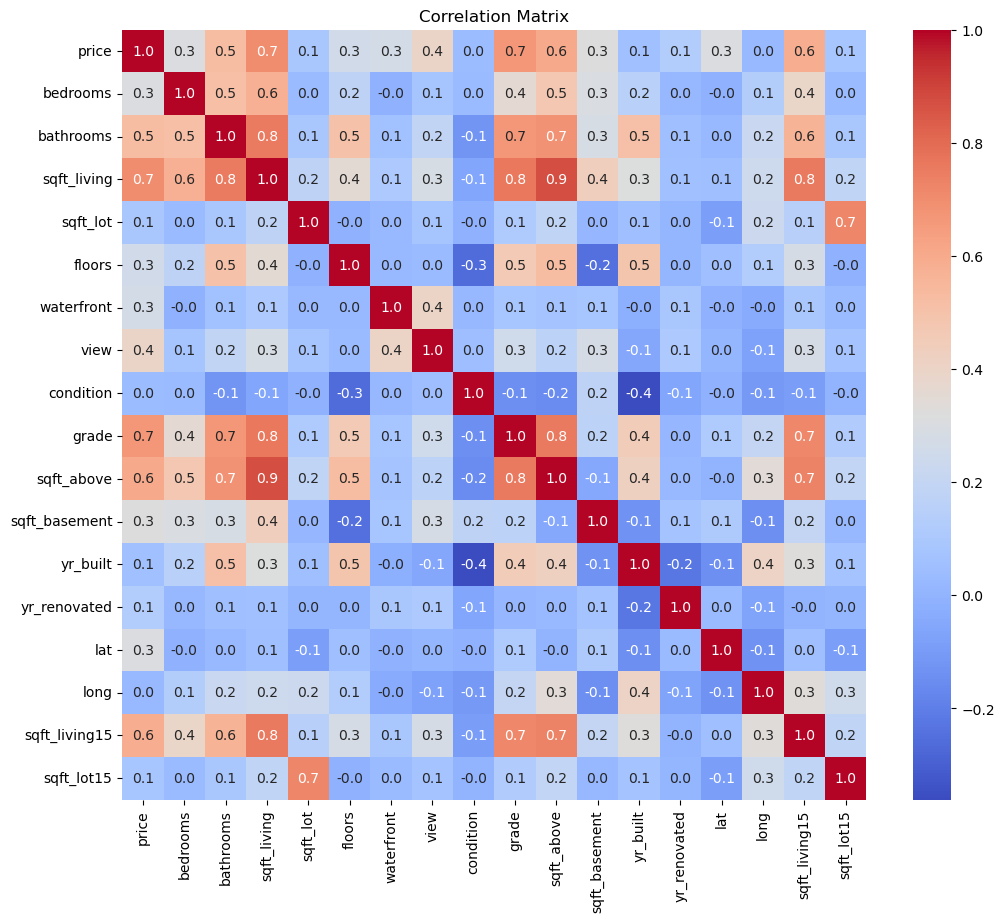

In [9]:
corr = housing_df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Correlation Matrix")
plt.show()

In [10]:
selected_features = ['sqft_living', 'bathrooms', 'grade']
X = housing_df[selected_features]
y = housing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
from sklearn.linear_model import LinearRegression

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

model_linreg =  LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

LinearRegression()

Model Coefficients: [179426.96220454 -29700.04289776 122426.02758625]
Intercept: 538882.0246135667
R-squared (R²): 0.5371160102559767
Mean Squared Error (MSE): 79894226121.7921


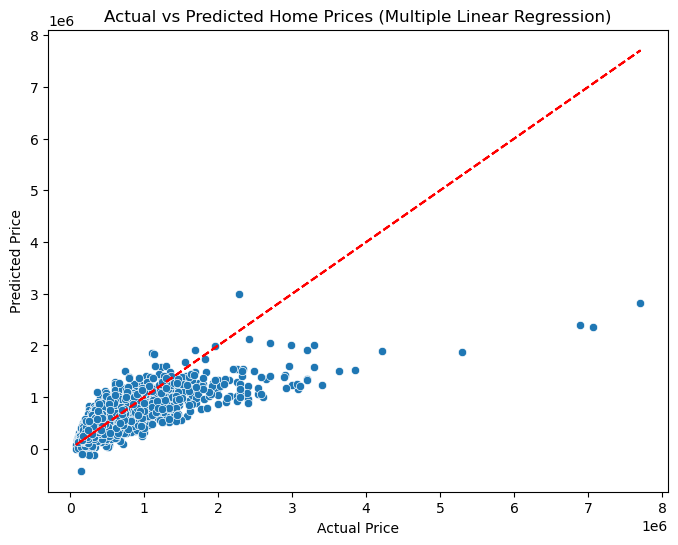

In [12]:
# Your code here. Add cells as needed.
# Select the three chosen features
selected_features = ['sqft_living', 'bathrooms', 'grade']
X = housing_df[selected_features]
y = housing_df['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

# Display results
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared (R²):", r2)
print("Mean Squared Error (MSE):", mse)

# Plot predicted vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Home Prices (Multiple Linear Regression)")
plt.show()

#### Your written answers here
Which features are you using and why based on the correlation matrix?
 
 sqft_living – The size of the living space is one of the biggest factors in determining home prices. Bigger homes usually cost more, so it makes sense to include this. The correlation matrix also shows it has a strong positive relationship with price.

bathrooms – More bathrooms generally mean a more expensive house. A home with multiple bathrooms is more convenient and tends to be valued higher, so this should help the model predict price better.

grade – This represents the quality of the house’s construction and design. Higher-grade homes are built better and look nicer, which usually makes them more expensive. Since it has a solid correlation with price, it’s a good feature to include.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

# Your code here. Add cells as needed.

from sklearn.liner_model import, Lasso, Ridge

y = housing_df['price']
X = housing_df.drop(columns='price')

model_lasso = Lasso(alpha=0.05)

Ridge Regression R² Score: 0.6810578720632636
Ridge Regression MSE: 55049720996.47389
Top 3 Most Important Features: ['grade', 'lat', 'sqft_living']


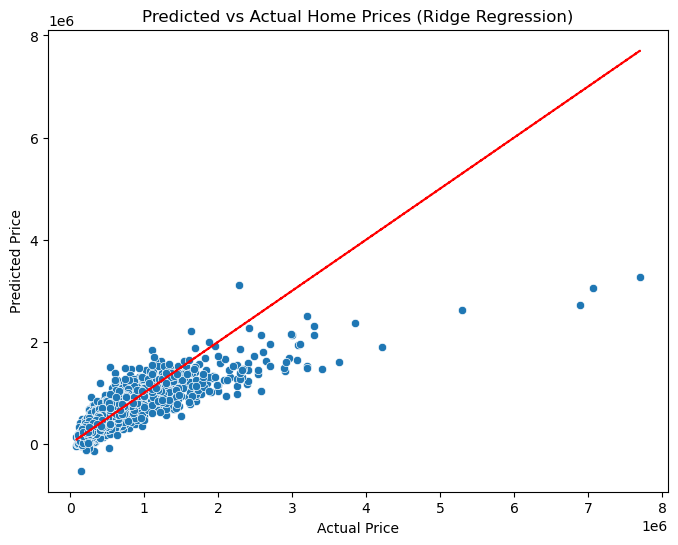

In [13]:
feature_columns = [col for col in housing_df.columns if col not in ['price', 'date', 'zipcode']]
X = housing_df[feature_columns]
y = housing_df['price']


# Save feature names
feature_names = X.columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_scaled_Train = scaler.fit_transform(X_train)
X_scaled_Test = scaler.transform(X_test)


# Train Ridge Regression Model with tuned alpha
alpha_value = 0.1  # Play around with this until R² > 0.65
ridge_model = Ridge(alpha=alpha_value)
ridge_model.fit(X_scaled_Train, y_train)
y_pred_ridge = ridge_model.predict(X_scaled_Test)

# Evaluate Ridge model
r2_ridge = ridge_model.score(X_scaled_Test, y_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Identify the top 3 most significant features
sorted_indices = np.argsort(np.abs(ridge_model.coef_))[::-1]  # Sort by absolute value
top_features = [feature_names[i] for i in sorted_indices[:3]]

# Display model performance
print("Ridge Regression R² Score:", r2_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Top 3 Most Important Features:", top_features)

# Plot predicted vs actual home prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Home Prices (Ridge Regression)")
plt.show()

### Your written answers here
Which regression did you use?
 - I used Ridge Regression Model

Does your regularized model look better than your MLR? How so?
 - Yes it improved because you can now see more of the differences in the housing.

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

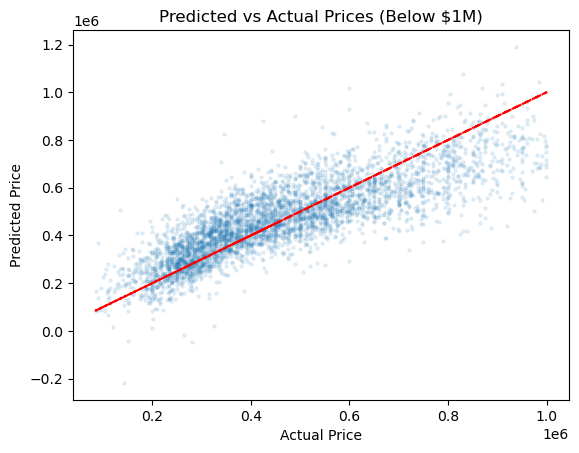

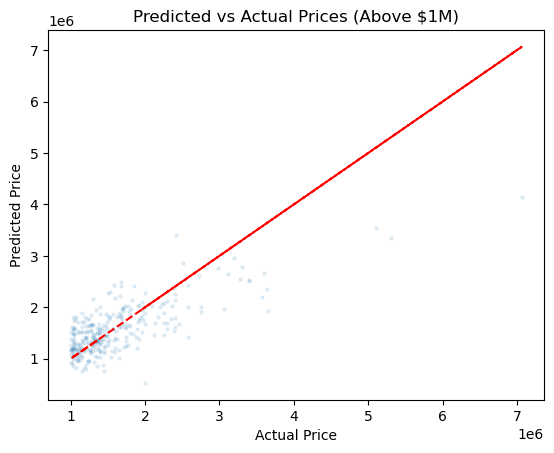

In [14]:
# Split data into below and above $1M
below_1M = housing_df[housing_df['price'] < 1000000]
above_1M = housing_df[housing_df['price'] >= 1000000]

# Function to split data
def split_data(df):
    X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df['price'], test_size=0.2, random_state=1)
    return X_train, X_test, y_train, y_test

X_train_below, X_test_below, y_train_below, y_test_below = split_data(below_1M)
X_train_above, X_test_above, y_train_above, y_test_above = split_data(above_1M)

# Standardize the features
scaler = StandardScaler()
X_scaled_Train_below = scaler.fit_transform(X_train_below)
X_scaled_Test_below = scaler.transform(X_test_below)

scaler2 = StandardScaler()
X_scaled_Train_above = scaler2.fit_transform(X_train_above)
X_scaled_Test_above = scaler2.transform(X_test_above)  

# Train Ridge regression models
ridge_below = Ridge(alpha=10)
ridge_above = Ridge(alpha=10)

ridge_below.fit(X_scaled_Train_below, y_train_below)
ridge_above.fit(X_scaled_Train_above, y_train_above)

# Predict
y_pred_below = ridge_below.predict(X_scaled_Test_below)
y_pred_above = ridge_above.predict(X_scaled_Test_above)

# Plot predictions
def plot_results(y_test, y_pred, title):
    plt.scatter(y_test, y_pred, s = 5, alpha=0.1)
    plt.plot(y_test, y_test, color='red', linestyle='dashed')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(title)
    plt.show()

plot_results(y_test_below, y_pred_below, "Predicted vs Actual Prices (Below $1M)")
plot_results(y_test_above, y_pred_above, "Predicted vs Actual Prices (Above $1M)")




<Your written answers>

In [15]:
# Calculate R^2 scores

r2_below = ridge_below.score(X_scaled_Test_below, y_test_below)
r2_above = ridge_above.score(X_scaled_Test_above, y_test_above)

print(f"R^2 for Below $1M Model: {r2_below:.4f}")
print(f"R^2 for Above $1M Model: {r2_above:.4f}")

 



R^2 for Below $1M Model: 0.6879
R^2 for Above $1M Model: 0.5529


 ### Your written answers here

 What are the $R^2$ for the two models?
 
 - R^2 for Below $1M Model: 0.6879
 - R^2 for Above $1M Model: 0.5529